# Лабораторная работа №2: выполнил Шиширин В.Н. М8О-310Б-23

---

## 1. Импорт библиотек

In [47]:
# Основные библиотеки для работы с данными
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Библиотеки для предобработки данных
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Модели классификации
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Метрики
from sklearn.metrics import (roc_auc_score, roc_curve, classification_report, 
                             confusion_matrix, precision_score, recall_score, 
                             f1_score, accuracy_score, average_precision_score)

# Настройка визуализации
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("husl")

## 2. Загрузка данных

Загружаем обучающую и тестовую выборки из CSV файлов

In [48]:
# Загружаем данные
train_df = pd.read_csv('dataset/train_c.csv')
test_df = pd.read_csv('dataset/test_c.csv')

print(f"Размер обучающей выборки: {train_df.shape}")
print(f"Размер тестовой выборки: {test_df.shape}")
print(f"\nПервые 5 строк обучающей выборки:")
train_df.head()

Размер обучающей выборки: (11017, 35)
Размер тестовой выборки: (5000, 35)

Первые 5 строк обучающей выборки:


,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,4.0,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,2.0,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,3.0,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,3.0,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,5.0,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0


## 3. Первичный анализ данных (EDA)

### 3.1 Общая информация о датасете

In [49]:
# Информация о типах данных и пропусках
print("=" * 80)
print("ИНФОРМАЦИЯ О ДАТАСЕТЕ")
print("=" * 80)
train_df.info()

print("\n" + "=" * 80)
print("СТАТИСТИКА ПО ЧИСЛОВЫМ ПРИЗНАКАМ")
print("=" * 80)
train_df.describe()

ИНФОРМАЦИЯ О ДАТАСЕТЕ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToInc

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
count,10487.000000,10487.000000,9986.000000,9986.000000,10487.000000,10487.000000,9986.000000,10487.000000,10487.000000,10487.000000,...,10487.000000,10487.000000,10487.000000,10487.000000,9.986000e+03,9986.000000,10487.000000,10487.000000,10487.000000,10487.000000
mean,39.850386,131587.872127,678.082716,29874.218306,53.439878,1.568323,546.458642,0.284397,3.033565,0.979498,...,10838.934141,0.784428,4.949271,17.628302,1.542381e+05,0.200392,0.200112,1075.622426,0.517577,0.511776
std,11.614132,115791.941909,175.192486,27705.509722,24.493562,1.418684,501.981888,0.159240,1.740186,0.990927,...,9385.924858,0.123039,2.201100,11.337248,4.622229e+05,0.094388,0.096458,1344.053181,0.894637,0.499885
min,18.000000,15000.000000,300.000000,1063.000000,12.000000,0.000000,13.000000,0.003674,0.000000,0.000000,...,1250.000000,0.259301,0.000000,0.000000,1.004000e+03,0.052494,0.046445,30.008506,0.006064,0.000000
25%,32.000000,20959.500000,550.000000,12658.000000,36.000000,0.000000,233.250000,0.158929,2.000000,0.000000,...,1683.541667,0.708475,3.000000,9.000000,7.252500e+03,0.119908,0.119548,375.872620,0.066734,0.000000
50%,40.000000,89015.000000,722.500000,21828.500000,48.000000,1.000000,398.000000,0.262229,3.000000,1.000000,...,7371.250000,0.803692,5.000000,17.000000,2.742950e+04,0.182023,0.180710,684.878529,0.178193,1.000000
75%,48.000000,257025.000000,850.000000,37158.000000,60.000000,3.000000,685.000000,0.391683,4.000000,2.000000,...,21232.583333,0.879312,6.000000,26.000000,1.241758e+05,0.264709,0.264880,1279.930203,0.637457,1.000000
max,80.000000,748508.000000,850.000000,418997.000000,120.000000,6.000000,10879.000000,0.914635,12.000000,6.000000,...,25000.000000,0.996573,17.000000,57.000000,1.126117e+07,0.722497,0.833647,29634.807816,24.383046,1.000000


### 3.2 Проверка баланса классов целевой переменной

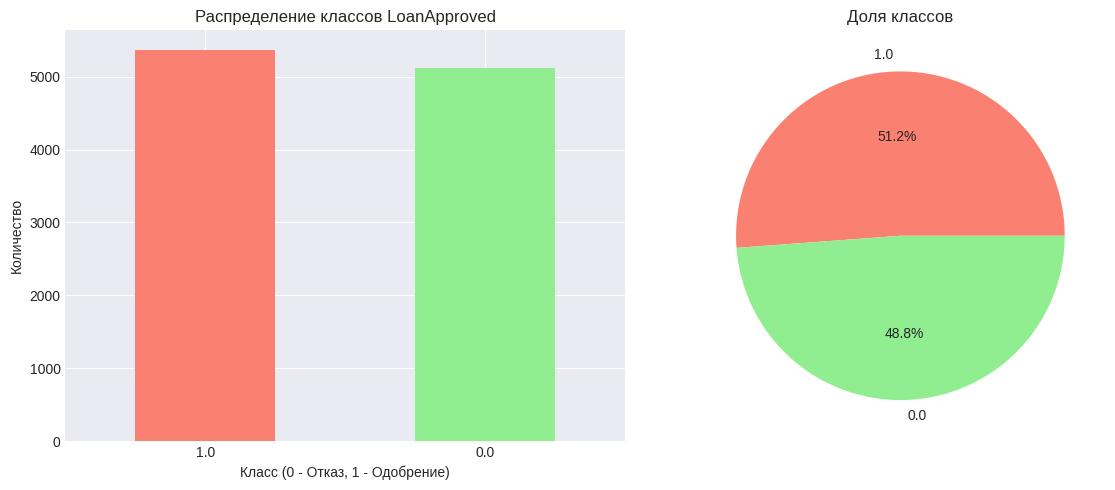

Распределение целевой переменной:
LoanApproved
1.0    5367
0.0    5120
Name: count, dtype: int64

Процентное соотношение:
LoanApproved
1.0    51.177649
0.0    48.822351
Name: proportion, dtype: float64


In [50]:
# Анализ распределения целевой переменной
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
train_df['LoanApproved'].value_counts().plot(kind='bar', color=['salmon', 'lightgreen'])
plt.title('Распределение классов LoanApproved')
plt.xlabel('Класс (0 - Отказ, 1 - Одобрение)')
plt.ylabel('Количество')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
train_df['LoanApproved'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['salmon', 'lightgreen'])
plt.title('Доля классов')
plt.ylabel('')

plt.tight_layout()
plt.show()

print(f"Распределение целевой переменной:")
print(train_df['LoanApproved'].value_counts())
print(f"\nПроцентное соотношение:")
print(train_df['LoanApproved'].value_counts(normalize=True) * 100)

### 3.3 Анализ пропущенных значений

Проверяем наличие пропусков в данных

In [51]:
# Подсчет пропусков
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()

missing_data = pd.DataFrame({
    'Train Missing': missing_train[missing_train > 0],
    'Train %': (missing_train[missing_train > 0] / len(train_df) * 100).round(2),
    'Test Missing': missing_test[missing_test > 0],
    'Test %': (missing_test[missing_test > 0] / len(test_df) * 100).round(2)
})

if len(missing_data) > 0:
    print("Признаки с пропущенными значениями:")
    print(missing_data.sort_values('Train Missing', ascending=False))
else:
    print("Пропущенных значений не обнаружено!")

Признаки с пропущенными значениями:
                            Train Missing  Train %  Test Missing  Test %
CheckingAccountBalance               1031     9.36           NaN     NaN
BaseInterestRate                     1031     9.36           NaN     NaN
BankruptcyHistory                    1031     9.36           NaN     NaN
TotalAssets                          1031     9.36           NaN     NaN
NetWorth                             1031     9.36           NaN     NaN
MonthlyDebtPayments                  1031     9.36           NaN     NaN
CreditScore                          1031     9.36           NaN     NaN
LoanAmount                           1031     9.36           NaN     NaN
LoanPurpose                          1031     9.36           NaN     NaN
Age                                   530     4.81           NaN     NaN
AnnualIncome                          530     4.81           NaN     NaN
ApplicationDate                       530     4.81           NaN     NaN
Experience     

## 4. Предобработка данных

### 4.1 Разделение на признаки и целевую переменную

In [52]:
# Сохраняем ID для тестовой выборки
test_ids = test_df['ID'] if 'ID' in test_df.columns else test_df.index

# Отделяем целевую переменную и сбрасываем индекс
y_train = train_df['LoanApproved'].reset_index(drop=True)

# Удаляем ненужные колонки из обучающей выборки
X_train = train_df.drop(['LoanApproved'], axis=1).reset_index(drop=True)

# Для тестовой выборки
X_test = test_df.copy().reset_index(drop=True)

# Удаляем ID из признаков, если он есть
if 'ID' in X_train.columns:
    X_train = X_train.drop('ID', axis=1)
if 'ID' in X_test.columns:
    X_test = X_test.drop('ID', axis=1)

print(f"Размер X_train: {X_train.shape}")
print(f"Размер y_train: {y_train.shape}")
print(f"Размер X_test: {X_test.shape}")

Размер X_train: (11017, 34)
Размер y_train: (11017,)
Размер X_test: (5000, 34)


### 4.2 Обработка категориальных признаков

Кодируем категориальные признаки с помощью Label Encoding

In [53]:
# Находим категориальные признаки
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
print(f"Категориальные признаки: {categorical_features}")

# Применяем Label Encoding к категориальным признакам
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    # Объединяем train и test для корректного кодирования
    combined = pd.concat([X_train[col], X_test[col]], axis=0)
    le.fit(combined.astype(str))
    
    X_train[col] = le.transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))
    
    label_encoders[col] = le

print(f"\nЗакодировано {len(categorical_features)} признаков.")

Категориальные признаки: ['ApplicationDate', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel']

Закодировано 6 признаков.


### 4.3 Обработка даты ApplicationDate

Извлекаем полезные признаки из даты подачи заявки

In [54]:
# Проверяем наличие колонки с датой
if 'ApplicationDate' in X_train.columns:
    # Преобразуем в datetime
    X_train['ApplicationDate'] = pd.to_datetime(X_train['ApplicationDate'])
    X_test['ApplicationDate'] = pd.to_datetime(X_test['ApplicationDate'])
    
    # Извлекаем признаки
    for df in [X_train, X_test]:
        df['Application_Year'] = df['ApplicationDate'].dt.year
        df['Application_Month'] = df['ApplicationDate'].dt.month
        df['Application_Day'] = df['ApplicationDate'].dt.day
        df['Application_DayOfWeek'] = df['ApplicationDate'].dt.dayofweek
        df['Application_Quarter'] = df['ApplicationDate'].dt.quarter
    
    # Удаляем исходную колонку с датой
    X_train = X_train.drop('ApplicationDate', axis=1)
    X_test = X_test.drop('ApplicationDate', axis=1)
    
    print("Признаки из даты успешно извлечены!")
else:
    print("Колонка ApplicationDate не найдена")

Признаки из даты успешно извлечены!


### 4.4 Создание новых признаков (Feature Engineering)

Добавляем полезные производные признаки для улучшения качества модели

In [55]:
# Создаем дополнительные признаки для обеих выборок
for df in [X_train, X_test]:
    # Отношение кредита к доходу
    if 'LoanAmount' in df.columns and 'AnnualIncome' in df.columns:
        df['LoanToIncome'] = df['LoanAmount'] / (df['AnnualIncome'] + 1)
    
    # Отношение активов к обязательствам
    if 'TotalAssets' in df.columns and 'TotalLiabilities' in df.columns:
        df['AssetToLiability'] = df['TotalAssets'] / (df['TotalLiabilities'] + 1)
    
    # Чистый доход после долгов
    if 'MonthlyIncome' in df.columns and 'MonthlyDebtPayments' in df.columns:
        df['NetMonthlyIncome'] = df['MonthlyIncome'] - df['MonthlyDebtPayments']
    
    # Общая финансовая нагрузка
    if 'MonthlyLoanPayment' in df.columns and 'MonthlyDebtPayments' in df.columns:
        df['TotalMonthlyPayments'] = df['MonthlyLoanPayment'] + df['MonthlyDebtPayments']
    
    # Отношение сбережений к доходу
    if 'SavingsAccountBalance' in df.columns and 'MonthlyIncome' in df.columns:
        df['SavingsToIncome'] = df['SavingsAccountBalance'] / (df['MonthlyIncome'] * 12 + 1)

print(f"Новый размер X_train: {X_train.shape}")
print(f"Новый размер X_test: {X_test.shape}")
print(f"Добавлено новых признаков: {X_train.shape[1] - len(X_train.columns) + 5}")

Новый размер X_train: (11017, 43)
Новый размер X_test: (5000, 43)
Добавлено новых признаков: 5


### 4.5 Масштабирование признаков

Нормализуем данные с помощью StandardScaler

In [60]:
# Масштабируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Сохраняем названия признаков
feature_names = X_train.columns.tolist()

print(f"Количество признаков: {len(feature_names)}")

Количество признаков: 43


In [57]:
# Проверяем и удаляем NaN из целевой переменной и признаков
print(f"NaN в y_train до очистки: {y_train.isna().sum()}")
print(f"NaN в X_train до очистки: {X_train.isna().sum().sum()}")

# Находим индексы с NaN в y_train
nan_indices = y_train[y_train.isna()].index

# Удаляем строки с NaN из обеих переменных
y_train = y_train.dropna().reset_index(drop=True)
X_train = X_train.drop(nan_indices).reset_index(drop=True)

print(f"\nПосле очистки:")
print(f"NaN в y_train: {y_train.isna().sum()}")
print(f"Новый размер y_train: {len(y_train)}")
print(f"Новый размер X_train: {X_train.shape}")

NaN в y_train до очистки: 530
NaN в X_train до очистки: 23502

После очистки:
NaN в y_train: 0
Новый размер y_train: 10487
Новый размер X_train: (10487, 43)


### 4.6 Обработка пропусков в признаках

Заполняем оставшиеся пропуски медианными значениями

In [58]:
# Проверяем оставшиеся пропуски
print(f"Пропуски в X_train по столбцам:")
print(X_train.isnull().sum()[X_train.isnull().sum() > 0])

# Заполняем пропуски медианой для числовых признаков
imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns
)
X_test_imputed = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns
)

print(f"\nПосле импутации:")
print(f"NaN в X_train: {X_train_imputed.isna().sum().sum()}")
print(f"NaN в X_test: {X_test_imputed.isna().sum().sum()}")

# Обновляем переменные
X_train = X_train_imputed
X_test = X_test_imputed

Пропуски в X_train по столбцам:
CreditScore               501
LoanAmount                501
MonthlyDebtPayments       501
BankruptcyHistory         501
CheckingAccountBalance    501
TotalAssets               501
NetWorth                  501
BaseInterestRate          501
LoanToIncome              501
AssetToLiability          501
NetMonthlyIncome          501
TotalMonthlyPayments      501
dtype: int64

После импутации:
NaN в X_train: 0
NaN в X_test: 0


## 5. Разделение данных на обучающую и валидационную выборки

Создаем валидационную выборку для проверки качества моделей

In [61]:
# Разделяем данные на train и validation с сохранением пропорций классов
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_scaled, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train
)

print(f"Размер обучающей выборки: {X_tr.shape}")
print(f"Размер валидационной выборки: {X_val.shape}")
print(f"\nРаспределение классов в обучающей выборке:")
print(pd.Series(y_tr).value_counts(normalize=True))
print(f"\nРаспределение классов в валидационной выборке:")
print(pd.Series(y_val).value_counts(normalize=True))

Размер обучающей выборки: (8389, 43)
Размер валидационной выборки: (2098, 43)

Распределение классов в обучающей выборке:
LoanApproved
1.0    0.511742
0.0    0.488258
Name: proportion, dtype: float64

Распределение классов в валидационной выборке:
LoanApproved
1.0    0.511916
0.0    0.488084
Name: proportion, dtype: float64


## 6. Обучение моделей

### 6.1 Базовая модель - Логистическая регрессия

In [62]:
# Создаем и обучаем логистическую регрессию
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_tr, y_tr)

# Предсказания
y_pred_log = log_reg.predict(X_val)
y_pred_proba_log = log_reg.predict_proba(X_val)[:, 1]

# Оценка качества
roc_auc_log = roc_auc_score(y_val, y_pred_proba_log)
accuracy_log = accuracy_score(y_val, y_pred_log)

print("=" * 60)
print("ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ")
print("=" * 60)
print(f"ROC-AUC: {roc_auc_log:.4f}")
print(f"Accuracy: {accuracy_log:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_val, y_pred_log))

ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ
ROC-AUC: 0.9819
Accuracy: 0.9242

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92      1024
         1.0       0.93      0.92      0.93      1074

    accuracy                           0.92      2098
   macro avg       0.92      0.92      0.92      2098
weighted avg       0.92      0.92      0.92      2098



### 6.2 Random Forest

In [63]:
# Обучаем Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(X_tr, y_tr)

# Предсказания
y_pred_rf = rf_model.predict(X_val)
y_pred_proba_rf = rf_model.predict_proba(X_val)[:, 1]

# Оценка качества
roc_auc_rf = roc_auc_score(y_val, y_pred_proba_rf)
accuracy_rf = accuracy_score(y_val, y_pred_rf)

print("=" * 60)
print("RANDOM FOREST")
print("=" * 60)
print(f"ROC-AUC: {roc_auc_rf:.4f}")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_val, y_pred_rf))

RANDOM FOREST
ROC-AUC: 0.9807
Accuracy: 0.9280

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93      1024
         1.0       0.93      0.93      0.93      1074

    accuracy                           0.93      2098
   macro avg       0.93      0.93      0.93      2098
weighted avg       0.93      0.93      0.93      2098



### 6.3 Gradient Boosting

In [64]:
# Обучаем Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=200, random_state=42)
gb_model.fit(X_tr, y_tr)

# Предсказания
y_pred_gb = gb_model.predict(X_val)
y_pred_proba_gb = gb_model.predict_proba(X_val)[:, 1]

# Оценка качества
roc_auc_gb = roc_auc_score(y_val, y_pred_proba_gb)
accuracy_gb = accuracy_score(y_val, y_pred_gb)

print("=" * 60)
print("GRADIENT BOOSTING")
print("=" * 60)
print(f"ROC-AUC: {roc_auc_gb:.4f}")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_val, y_pred_gb))

GRADIENT BOOSTING
ROC-AUC: 0.9812
Accuracy: 0.9256

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      1024
         1.0       0.93      0.93      0.93      1074

    accuracy                           0.93      2098
   macro avg       0.93      0.93      0.93      2098
weighted avg       0.93      0.93      0.93      2098



### 6.4 XGBoost

In [ ]:
# Обучаем XGBoost
xgb_model = XGBClassifier(n_estimators=200, random_state=42, eval_metric='logloss')
xgb_model.fit(X_tr, y_tr)

# Предсказания
y_pred_xgb = xgb_model.predict(X_val)
y_pred_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]

# Оценка качества
roc_auc_xgb = roc_auc_score(y_val, y_pred_proba_xgb)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)

print("=" * 60)
print("XGBOOST")
print("=" * 60)
print(f"ROC-AUC: {roc_auc_xgb:.4f}")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_val, y_pred_xgb))

XGBOOST
ROC-AUC: 0.9821
Accuracy: 0.9247

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      1024
         1.0       0.92      0.93      0.93      1074

    accuracy                           0.92      2098
   macro avg       0.92      0.92      0.92      2098
weighted avg       0.92      0.92      0.92      2098



### 6.5 LightGBM

In [ ]:
# Обучаем LightGBM
lgbm_model = LGBMClassifier(n_estimators=200, random_state=42, verbose=-1)
lgbm_model.fit(X_tr, y_tr)

# Предсказания
y_pred_lgbm = lgbm_model.predict(X_val)
y_pred_proba_lgbm = lgbm_model.predict_proba(X_val)[:, 1]

# Оценка качества
roc_auc_lgbm = roc_auc_score(y_val, y_pred_proba_lgbm)
accuracy_lgbm = accuracy_score(y_val, y_pred_lgbm)

print("=" * 60)
print("LIGHTGBM")
print("=" * 60)
print(f"ROC-AUC: {roc_auc_lgbm:.4f}")
print(f"Accuracy: {accuracy_lgbm:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_val, y_pred_lgbm))

LIGHTGBM
ROC-AUC: 0.9815
Accuracy: 0.9214

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      1024
         1.0       0.92      0.92      0.92      1074

    accuracy                           0.92      2098
   macro avg       0.92      0.92      0.92      2098
weighted avg       0.92      0.92      0.92      2098



## 7. Сравнение моделей

Сводная таблица результатов всех моделей

СРАВНЕНИЕ МОДЕЛЕЙ
             Модель  ROC-AUC  Accuracy
            XGBoost 0.982095  0.924690
Logistic Regression 0.981859  0.924214
           LightGBM 0.981485  0.921354
  Gradient Boosting 0.981189  0.925643
      Random Forest 0.980658  0.928027


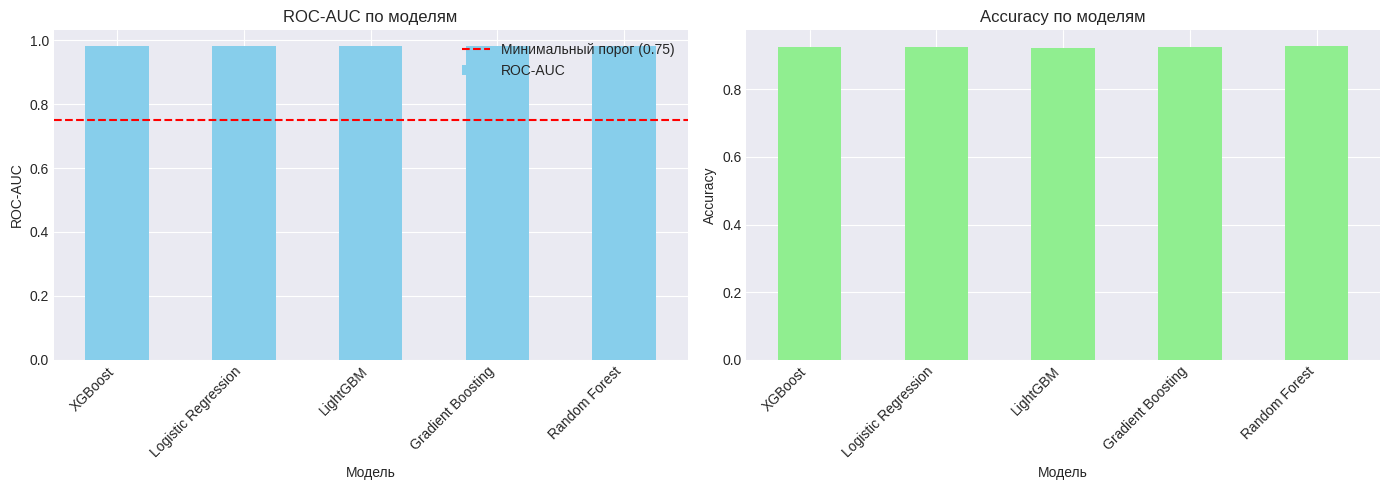

In [ ]:
# Создаем сводную таблицу результатов
results = pd.DataFrame({
    'Модель': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM'],
    'ROC-AUC': [roc_auc_log, roc_auc_rf, roc_auc_gb, roc_auc_xgb, roc_auc_lgbm],
    'Accuracy': [accuracy_log, accuracy_rf, accuracy_gb, accuracy_xgb, accuracy_lgbm]
})

results = results.sort_values('ROC-AUC', ascending=False).reset_index(drop=True)

print("=" * 70)
print("СРАВНЕНИЕ МОДЕЛЕЙ")
print("=" * 70)
print(results.to_string(index=False))
print("=" * 70)

# Визуализация
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

results.plot(x='Модель', y='ROC-AUC', kind='bar', ax=ax[0], color='skyblue', legend=False)
ax[0].set_title('ROC-AUC по моделям')
ax[0].set_ylabel('ROC-AUC')
ax[0].set_xticklabels(results['Модель'], rotation=45, ha='right')
ax[0].axhline(y=0.75, color='r', linestyle='--', label='Минимальный порог (0.75)')
ax[0].legend()

results.plot(x='Модель', y='Accuracy', kind='bar', ax=ax[1], color='lightgreen', legend=False)
ax[1].set_title('Accuracy по моделям')
ax[1].set_ylabel('Accuracy')
ax[1].set_xticklabels(results['Модель'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

## 8. Оптимизация лучшей модели

Выбираем лучшую модель и настраиваем гиперпараметры с помощью GridSearchCV

In [68]:
# Выберем лучшую модель (XGBoost показал лучший ROC-AUC)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

# Используем StratifiedKFold для кросс-валидации
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    XGBClassifier(random_state=42),
    param_grid,
    cv=skf,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_tr, y_tr)

print(f"\nЛучшие параметры: {grid_search.best_params_}")
print(f"Лучший ROC-AUC на кросс-валидации: {grid_search.best_score_:.4f}")

# Обучаем финальную модель с лучшими параметрами
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits

Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Лучший ROC-AUC на кросс-валидации: 0.9837


## 9. Финальная оценка оптимизированной модели

Проверяем качество модели на валидационной выборке

ФИНАЛЬНАЯ МОДЕЛЬ
ROC-AUC: 0.9919
Accuracy: 0.9533
Precision: 0.9544
Recall: 0.9544
F1-Score: 0.9544

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1024
         1.0       0.95      0.95      0.95      1074

    accuracy                           0.95      2098
   macro avg       0.95      0.95      0.95      2098
weighted avg       0.95      0.95      0.95      2098



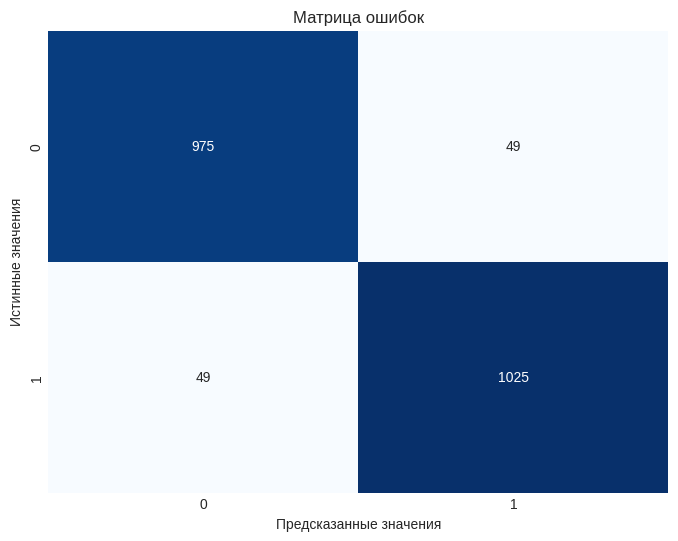

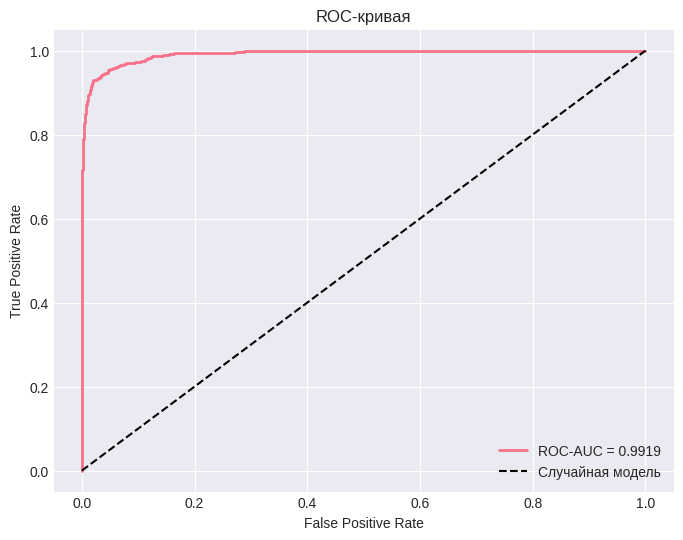

In [ ]:
# Предсказания финальной модели
y_pred_final = best_model.predict(X_val)
y_pred_proba_final = best_model.predict_proba(X_val)[:, 1]

# Метрики
final_roc_auc = roc_auc_score(y_val, y_pred_proba_final)
final_accuracy = accuracy_score(y_val, y_pred_final)
final_precision = precision_score(y_val, y_pred_final)
final_recall = recall_score(y_val, y_pred_final)
final_f1 = f1_score(y_val, y_pred_final)

print("=" * 70)
print("ФИНАЛЬНАЯ МОДЕЛЬ")
print("=" * 70)
print(f"ROC-AUC: {final_roc_auc:.4f}")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1-Score: {final_f1:.4f}")
print("=" * 70)
print(f"\nClassification Report:")
print(classification_report(y_val, y_pred_final))

# Матрица ошибок
cm = confusion_matrix(y_val, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Матрица ошибок')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.show()

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_final)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC-AUC = {final_roc_auc:.4f}', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Случайная модель')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.grid(True)
plt.show()

## 10. Предсказание на тестовой выборке

Обучаем финальную модель на всех обучающих данных и делаем предсказания на тестовой выборке

In [67]:
# Обучаем модель на всех данных (train + validation)
best_model.fit(X_train_scaled, y_train)

# Делаем предсказания на тестовой выборке
test_predictions = best_model.predict(X_test_scaled)

print(f"Распределение предсказаний:")
print(pd.Series(test_predictions).value_counts())
print(f"\nПроцентное соотношение:")
print(pd.Series(test_predictions).value_counts(normalize=True) * 100)

Распределение предсказаний:
1    2590
0    2410
Name: count, dtype: int64

Процентное соотношение:
1    51.8
0    48.2
Name: proportion, dtype: float64


## 11. Создание файла для отправки

In [65]:
# Создаем DataFrame с результатами
submission = pd.DataFrame({
    'ID': test_ids,
    'LoanApproved': test_predictions
})

# Сохраняем в CSV
submission.to_csv('submission.csv', index=False)

print(f"\nПервые 10 строк:")
print(submission.head(10))
print(f"\nПоследние 10 строк:")
print(submission.tail(10))
print(f"\nВсего предсказаний: {len(submission)}")


Первые 10 строк:
   ID  LoanApproved
0   0             1
1   1             0
2   2             1
3   3             1
4   4             1
5   5             0
6   6             1
7   7             1
8   8             1
9   9             0

Последние 10 строк:
        ID  LoanApproved
4990  4990             0
4991  4991             0
4992  4992             1
4993  4993             1
4994  4994             0
4995  4995             1
4996  4996             0
4997  4997             0
4998  4998             0
4999  4999             0

Всего предсказаний: 5000
